In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
df = pd.read_csv('activities_cleaned.csv', sep=';', index_col=0)
df = df.sample(frac=1).reset_index(drop=True)
df = df[0:10000]

In [3]:
K = 3
scaler = StandardScaler()
scaler.fit(df)
data_scaled = scaler.transform(df)

In [4]:
kmeans_model = KMeans(n_clusters=K, init='random', n_init=1)
kmeans_model.fit(data_scaled)
y = kmeans_model.labels_

In [5]:
pca_model = PCA(n_components=2)
pca_coordinates = pca_model.fit_transform(data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)

In [6]:
silhouette_avg = round(silhouette_score(data_scaled, y), 5)
sample_silhouette_values = silhouette_samples(data_scaled, y)

print(f'Overall Clustering Silhouette {silhouette_avg}')

Overall Clustering Silhouette 0.14985


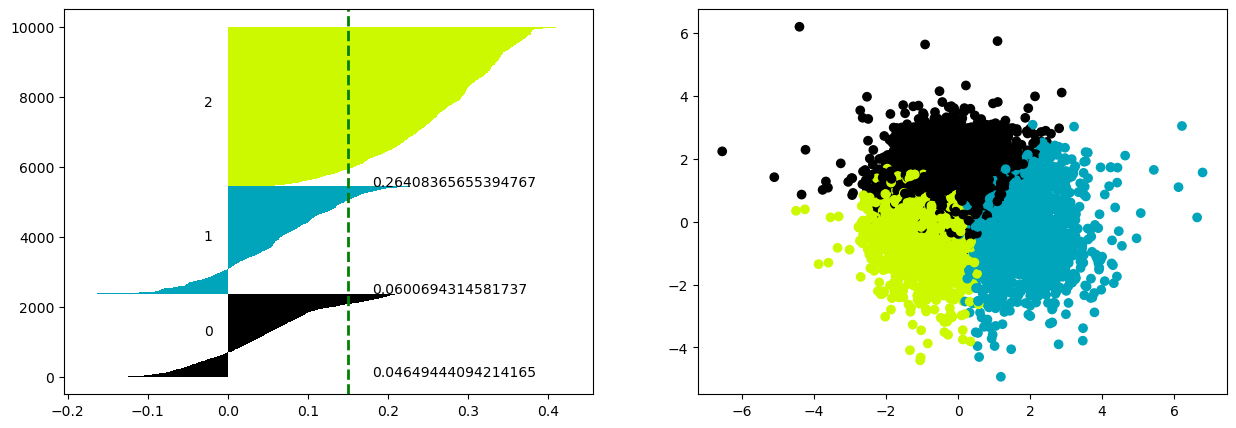

In [7]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(y)):
    cluster_silhouette_vals = sample_silhouette_values[y == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(y.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)